In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

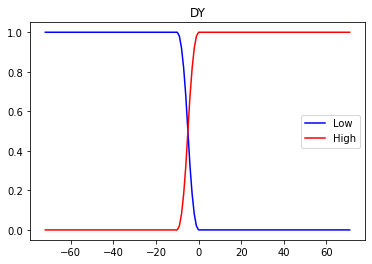

In [2]:
dist_max = 72
dy_range = np.arange(-dist_max, dist_max)
dy_high = fuzz.smf(dy_range, -10, 0)
dy_low = 1 - dy_high

fig = plt.figure()
plt.plot(dy_range, dy_low, 'b', linewidth=1.5, label='Low')
plt.plot(dy_range, dy_high, 'r', linewidth=1.5, label='High')
plt.title('DY')
plt.legend()

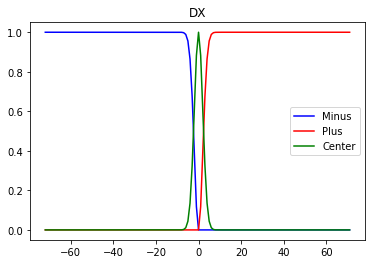

In [3]:
zero_index = np.where(dy_range == 0)[0][0]
dx_center = fuzz.gaussmf(dy_range, 0, 2)
dx_plus = 1 - dx_center
dx_plus[0:zero_index] = 0
dx_minus = 1 - dx_center
dx_minus[zero_index:] = 0

fig = plt.figure()
plt.plot(dy_range, dx_minus, 'b', linewidth=1.5, label='Minus')
plt.plot(dy_range, dx_plus, 'r', linewidth=1.5, label='Plus')
plt.plot(dy_range, dx_center, 'g', linewidth=1.5, label="Center")
plt.title('DX')
plt.legend()

Text(0.5, 1.0, 'Distance')

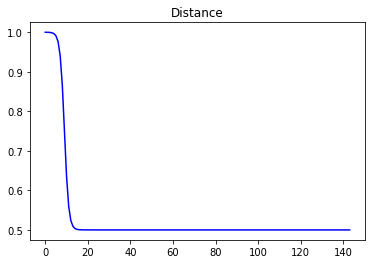

In [4]:
dist_range = np.arange(0, dist_max * 2)
dist_func = fuzz.sigmf(dist_range, dist_max * 2 - 10, 1)[::-1] * .5 + .5

fig = plt.figure()
plt.plot(dist_range, dist_func, 'b', linewidth=1.5)
plt.title('Distance')

Text(0.5, 1.0, 'Obstacles in vicinity')

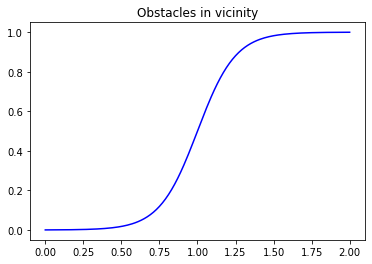

In [5]:
value_range = np.arange(0, 2.01, 0.01)
membership_func = fuzz.sigmf(value_range, 1, 8)

fig = plt.figure()
plt.plot(value_range, membership_func, 'b', linewidth=1.5)
plt.title('Obstacles in vicinity')

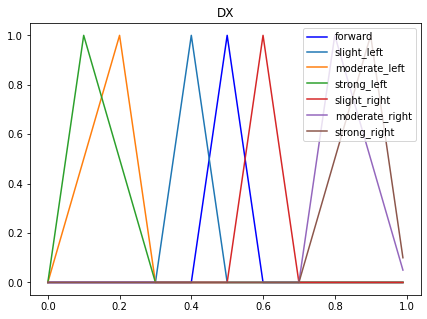

In [6]:
dir_range = np.arange(0, 1, 0.01)
dir_forward = fuzz.trimf(dir_range, [0.4, 0.5, 0.6])
dir_left_weak = fuzz.trimf(dir_range, [0., 0.2, 0.3])
dir_right_weak = fuzz.trimf(dir_range, [0.7, 0.8, 1.])

dir_left_strong = fuzz.trapmf(dir_range, [0., 0.1, 0.1, 0.3])
dir_right_strong = fuzz.trapmf(dir_range, [0.7, 0.9, 0.9, 1.])

dir_left_very_weak = fuzz.trapmf(dir_range, [.3, 0.4, 0.4, 0.5])
dir_right_very_weak = fuzz.trapmf(dir_range, [0.5, 0.6, 0.6, .7])

fig = plt.figure(figsize=(7,5))
plt.plot(dir_range, dir_forward, 'b', linewidth=1.5, label='forward')
plt.plot(dir_range, dir_left_very_weak, linewidth=1.5, label='slight_left')
plt.plot(dir_range, dir_left_weak, linewidth=1.5, label='moderate_left')
plt.plot(dir_range, dir_left_strong, linewidth=1.5, label='strong_left')
plt.plot(dir_range, dir_right_very_weak, linewidth=1.5, label='slight_right')
plt.plot(dir_range, dir_right_weak, linewidth=1.5, label='moderate_right')
plt.plot(dir_range, dir_right_strong, linewidth=1.5, label='strong_right')
plt.title('DX')
plt.legend()